# Examining Data of Gun Related Incidents
I've taken the compiled and cleaned data provided by https://github.com/fivethirtyeight/guns-data and tried analyze it.

first, I begin by reading the file, and converting it into a list.

In [139]:
import csv
import datetime
from __future__ import division
import matplotlib.pyplot as plt

year_counts = {}
date_counts = {}
sex_counts = {}
race_counts = {}
intent_counts = {}
homicide_race_counts = {}
race_per_hunK= {}
rate = 100000

ofile = csv.reader(open("guns-data.csv", 'r'))
data = list(ofile)


I realize that the data contains headers, so I seperate the top row.
Once that's done, I take the the data from all the coloumns I want to analyze and assign it to their respective variables.

In [120]:
headers = data[0]
data = data[1:]

years = [row[1] for row in data]
dates = [datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in data]
race = [row[7] for row in data]
intents = [row[3] for row in data]
sex = [row[5] for row in data]
# Sample
race[:10]

['White',
 'Native American/Native Alaskan',
 'White',
 'Black',
 'White',
 'Native American/Native Alaskan',
 'White',
 'Native American/Native Alaskan',
 'White',
 'Native American/Native Alaskan']

My intention now is to tally all the data in related to the coloumn info. When working with it earlier, I realized that it might be a repetitive task, so I created a generaly function which took in the coloumn data as a parameter and assigned the tallies to a dictionary.The function then returns the dictionary which could be assigned to a properly named variable outside the function. 

In [150]:
def tally_coloumn(coloumn_list):
    tally_dict = {}
    for row in coloumn_list:
        if row not in tally_dict:
            tally_dict[row] = 1
        else:
            tally_dict[row] += 1
    return tally_dict

year_counts = tally_coloumn(years)
date_counts = tally_coloumn(dates)
race_counts = tally_coloumn(race)
sex_counts = tally_coloumn(sex)
intents_counts = tally_coloumn(intents)
# Sample
race_counts

{'Asian/Pacific Islander': 1325,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 916,
 'White': 66233}

I realized after that I wanted to get the rate of incidents in relation to the population, so I downloaded the census data csv file and read it. I then mapped the values to the appropriate race/group.

In [113]:
census_ofile = csv.reader(open("census.csv", 'r'))
census_data = list(census_ofile)[1:]
print(census_data)
mappings = {
    'Asian/Pacific Islander': float(census_data[0][14]+ census_data[0][15]),
    'Black': float(census_data[0][12]),
    'Native American/Native Alaskan': float(census_data[0][13]),
    'Hispanic': float(census_data[0][11]),
    'White': float(census_data[0][10])
}
mappings['White']

[['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']]


197318956.0

In [122]:
white_gun_death_rate_perhunK = race_counts['White'] / mappings['White'] * rate
white_gun_death_rate_perhunK

33.566465859468664

In [115]:
for race in race_counts:
    race_per_hunK[race] = race_counts[race] / mappings[race] * rate
race_per_hunK

    

{'Asian/Pacific Islander': 8.746980714890115e-06,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

In [133]:
def compare_count(compare_list, iterable_list, compare_str):   
    return_dict = {}
    for i, row in enumerate(iterable_list):
        if row not in return_dict:
            return_dict[row] = 0
        if intents[i] == compare_str:
            return_dict[row] += 1
            
    return return_dict
homicide_race_counts = compare_count(intents, race, "Homicide")
suicide_race_counts = compare_count(intents, race, "Suicide")

suicide_race_counts

{'Asian/Pacific Islander': 744,
 'Black': 3332,
 'Hispanic': 3171,
 'Native American/Native Alaskan': 554,
 'White': 55368}

In [134]:
for i, val in homicide_race_counts.items():
    race_per_hunK[i] = val / mappings[i] * rate
race_per_hunK

{'Asian/Pacific Islander': 3.687452654316421e-06,
 'Black': 48.471284987180944,
 'Hispanic': 12.627161104219914,
 'Native American/Native Alaskan': 8.717729026240365,
 'White': 4.6356417981453335}

In [137]:
for i, val in suicide_race_counts.items():
    race_per_hunK[i] = val / mappings[i] * rate
race_per_hunK

{'Asian/Pacific Islander': 4.907808183920245e-06,
 'Black': 8.278130270491385,
 'Hispanic': 7.106980451097149,
 'Native American/Native Alaskan': 14.814791044592523,
 'White': 28.060152517733776}

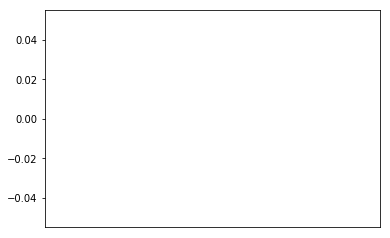

In [145]:
plt.bar(range(len(race_per_hunK)), race_per_hunK.values(), align='center')
plt.xticks(range(len(race_per_hunK)), race_per_hunK.keys())

plt.show()